<a href="https://colab.research.google.com/github/lucasumeda/intro-git/blob/master/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install gitly


In [47]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer="github") #Mostrar gráfico no GitHub e fica estático
#gitly = GitlyPlotter(renderer="colab") #Mostrar gráfico no GitHub e fica dinâmico

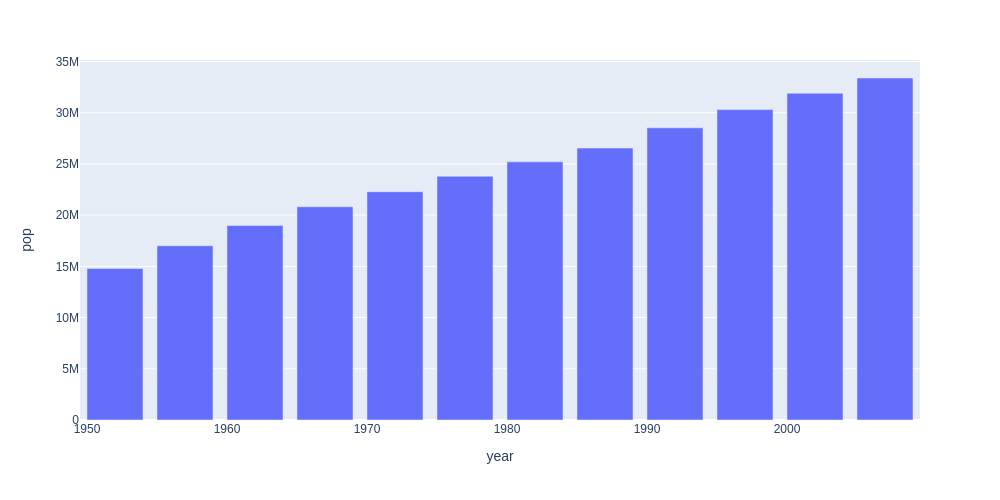

In [48]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')

gitly.show(fig, width = 1000, height = 500)

##Carregar os CSVs


In [49]:
import pandas as pd


df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_customers_dataset[1].csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_geolocation_dataset[1].csv')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_order_items_dataset[1].csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_order_payments_dataset[1].csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_order_reviews_dataset[1].csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_orders_dataset[1].csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_products_dataset[1].csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tiago/Aula 1/Arquivos/olist_sellers_dataset[1].csv')

##Exploração de Datasets

In [50]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [51]:
print(df_clientes.customer_city.unique())
len(df_clientes.customer_city.unique()) #Qtd total de cidades

['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']


4119

In [52]:
len(df_clientes.customer_id.unique())

99441

In [53]:
df_clientes.groupby(by = "customer_city").count().sort_values(by = "customer_id", ascending = False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
...,...,...,...,...
ibiara,1,1,1,1
rio espera,1,1,1,1
rio dos indios,1,1,1,1


In [54]:
df_clientes.customer_city.value_counts()

sao paulo               15540
rio de janeiro           6882
belo horizonte           2773
brasilia                 2131
curitiba                 1521
                        ...  
pedrao                      1
humberto de campos          1
santa maria do salto        1
frei gaspar                 1
boa vista do cadeado        1
Name: customer_city, Length: 4119, dtype: int64

In [55]:
df_clientes.customer_city.value_counts().head(7).reset_index() #transforma index em uma coluna

,index,customer_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379


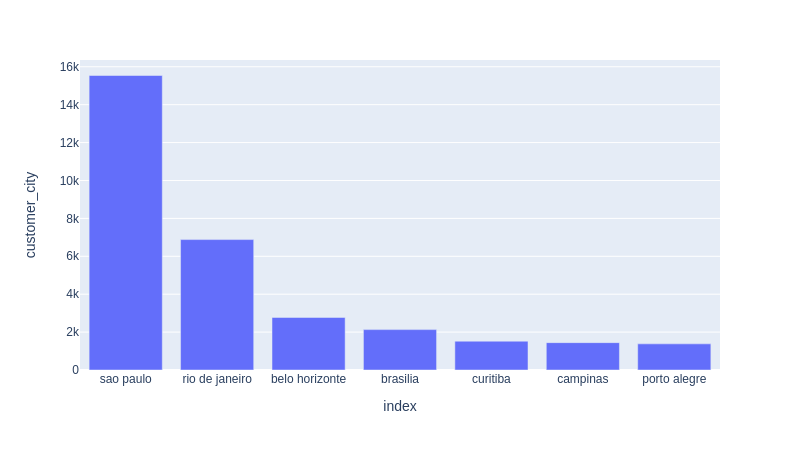

In [56]:
import plotly.express as px

data = df_clientes.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show( fig )

In [57]:
df_clientes.customer_state.value_counts().head(7).reset_index() #transforma index em uma coluna

,index,customer_state
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380


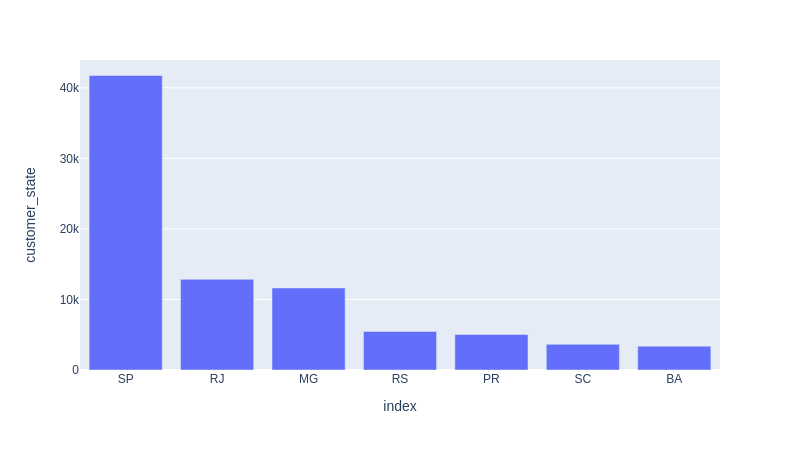

In [58]:
import plotly.express as px

data = df_clientes.customer_state.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_state')
gitly.show( fig )

In [59]:
df_group = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_group[ (df_group['customer_id'] >= 4) ] #Usuários repetidos

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
083ca1aa470c280236380973a48f77c6,4,4,4,4
08e5b38d7948d37fbb2a59fc5e175ab1,4,4,4,4
12d8b5ed661190a3a08183644dfc504d,4,4,4,4
12f5d6e1cbf93dafd9dcc19095df0b3d,6,6,6,6
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
25a560b9a6006157838aab1bdbd68624,4,4,4,4
2ddc001b620bd90d0f4378cfde1db887,4,4,4,4
35ecdf6858edc6427223b64804cf028e,5,5,5,5
394ac4de8f3acb14253c177f0e15bc58,5,5,5,5


In [60]:
##Criar algo mais decente
##ter insights, análises descritivas sobre os temas